# **UAS**
Nama : Bagus Abdullah Eka Saputra

Nim : 210411100188

# **Analisis Data Ecoli**
Kita akan analisis dataset Ecoli menggunakan 3 metode klasifikasi berbeda dan membandingkan performanya untuk menentukan model terbaik.

## Dataset: Ecoli (UCI ML Repository)
* Tujuan: Klasifikasi lokasi subseluler protein (8 kelas).

* Jumlah data: 336 baris.

* Fitur: 7 numerik + 1 target kategori.

## Tahapan Analisis
1. Data Understanding
* Sumber: https://archive.ics.uci.edu/ml/datasets/ecoli

* Fitur:

  * mcg, gvh, lip, chg, aac, alm1, alm2 (semua numerik).

* Target:

  * cp, im, pp, imU, om, omL, imL, imS (klasifikasi multikelas).

* Distribusi kelas: Tidak seimbang (misalnya cp = 143, imS = 2).

2. Preprocessing
* Load data dan beri nama kolom.

* Encode target dengan LabelEncoder.

* Standardisasi fitur menggunakan StandardScaler.

* Bagi data: train (70%) - test (30%), stratified.

* Tangani imbalance dengan opsi:

  * SMOTE (untuk balancing).

  * Atau class_weight='balanced' saat training model.

3. Modeling dengan 3 Metode
Kita uji 3 algoritma berbeda:

## A. Random Forest Classifier
* Cocok untuk data tabular.

* Bisa handle fitur numerik & imbalance.

* Param: n_estimators, max_depth, class_weight.

## B. Support Vector Machine (SVM)
* Kernel RBF.

* Bagus untuk data dimensi kecil.

* Param: C, gamma, class_weight.

## C. Multi-layer Perceptron (Neural Network)
* Klasifikasi multikelas.

* Param: hidden_layer_sizes, alpha, max_iter.

4. Evaluasi
* Metode evaluasi: Stratified 5-Fold Cross-Validation.

* Metrik evaluasi:

  * Accuracy

  * Precision, Recall, F1-Score (macro average) — karena data tidak seimbang.

  * Confusion Matrix

  * Classification Report

5. Deployment

In [1]:
pip install ucimlrepo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


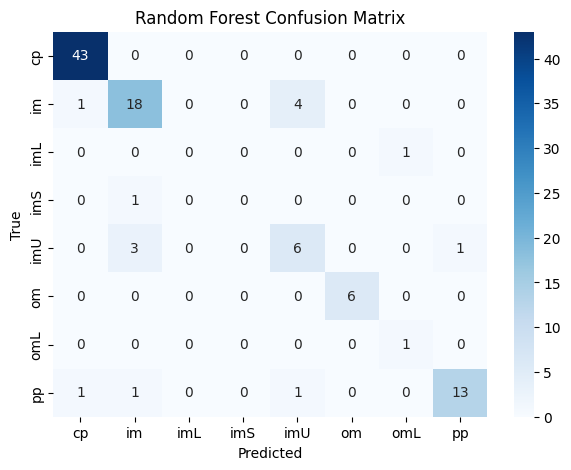

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


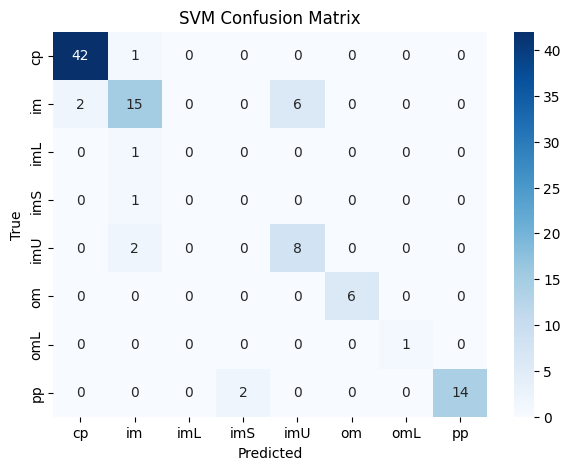

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


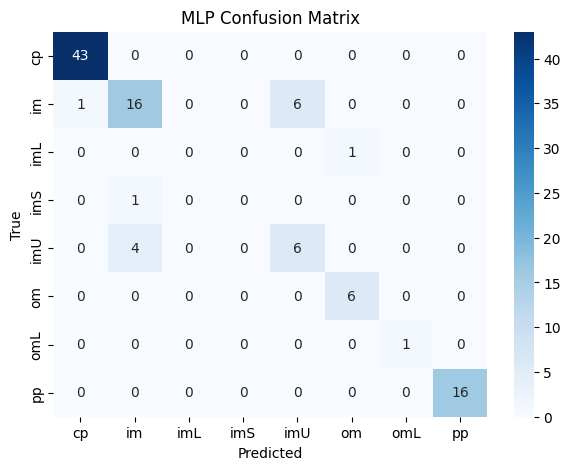

Hasil Evaluasi:

Model: Random Forest
Accuracy: 0.8614
F1 Score (Macro): 0.6081
Classification Report:
              precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.78      0.78      0.78        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.55      0.60      0.57        10
          om       1.00      1.00      1.00         6
         omL       0.50      1.00      0.67         1
          pp       0.93      0.81      0.87        16

    accuracy                           0.86       101
   macro avg       0.59      0.65      0.61       101
weighted avg       0.85      0.86      0.85       101


Model: SVM
Accuracy: 0.8515
F1 Score (Macro): 0.6579
Classification Report:
              precision    recall  f1-score   support

          cp       0.95      0.98      0.97        43
          im       0.75      0.65      0.70        23
      

In [3]:
# ----------------------------------
# 1. Ambil Data dari UCI
# ----------------------------------
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset ecoli dari UCI
ecoli = fetch_ucirepo(id=39)
X = ecoli.data.features
y = ecoli.data.targets

# ----------------------------------
# 2. Preprocessing
# ----------------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# ----------------------------------
# 3. Modeling (3 metode)
# ----------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar model
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Simpan hasil evaluasi
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    results[name] = {
        'model': model,
        'accuracy': acc,
        'f1_macro': f1,
        'report': report,
        'confusion_matrix': cm
    }

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ----------------------------------
# 4. Bandingkan Model
# ----------------------------------
print("Hasil Evaluasi:")
for name, r in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {r['accuracy']:.4f}")
    print(f"F1 Score (Macro): {r['f1_macro']:.4f}")
    print("Classification Report:")
    print(r['report'])


In [4]:
import joblib

# Misal kamu ingin menyimpan model terbaik berdasarkan F1 Macro
best_model_name = max(results, key=lambda x: results[x]['f1_macro'])
best_model = results[best_model_name]['model']

# Simpan model
joblib.dump(best_model, f"{best_model_name.lower().replace(' ', '_')}_ecoli_model.pkl")

# Contoh output nama file: random_forest_ecoli_model.pkl
print(f"Model terbaik '{best_model_name}' telah disimpan sebagai file .pkl")


Model terbaik 'SVM' telah disimpan sebagai file .pkl


In [9]:
import joblib

# Load model dari file
model = joblib.load("svm_ecoli_model.pkl")

# Prediksi
sample = [[0.48, 0.56, 0.00, 0.50, 0.66, 0.54, 0.36]]  # contoh input hasil scaling
predicted_class = model.predict(sample)
print(predicted_class)


[1]
